## SMOTE를 활용한 데이터 증강

In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE

In [2]:
# 파일 경로 설정
file_path = "data.csv"

# CSV 파일을 DataFrame으로 불러오기
data = pd.read_csv(file_path)

In [3]:
# Count the occurrences of each attack category
bankrupt_count = data['Bankrupt?'].value_counts()
print(bankrupt_count)

0    6599
1     220
Name: Bankrupt?, dtype: int64


In [4]:
# Find the maximum count of attack categories
max_count = bankrupt_count.max()
print(max_count)

6599


In [6]:
# Instantiate SMOTE
smote = SMOTE(sampling_strategy={i: max_count for i in bankrupt_count.index})

# Oversample the dataset
X = data.drop(columns=['Bankrupt?'])
y = data['Bankrupt?']
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new balanced DataFrame
balanced_data = pd.concat([X_resampled, y_resampled], axis=1)

# Check the balanced count for each attack category
balanced_Bankrupt_counts = balanced_data['Bankrupt?'].value_counts()
print(balanced_Bankrupt_counts)

# Save the oversampled data to a CSV file
oversampled_file_path = 'oversampled_data.csv'
balanced_data.to_csv(oversampled_file_path, index=False)

print(f'Oversampled data saved to {oversampled_file_path}')

1    6599
0    6599
Name: Bankrupt?, dtype: int64
Oversampled data saved to oversampled_data.csv


In [11]:
balanced_data = pd.read_csv('oversampled_data.csv')
print(balanced_data['Bankrupt?'].value_counts())

1    6599
0    6599
Name: Bankrupt?, dtype: int64


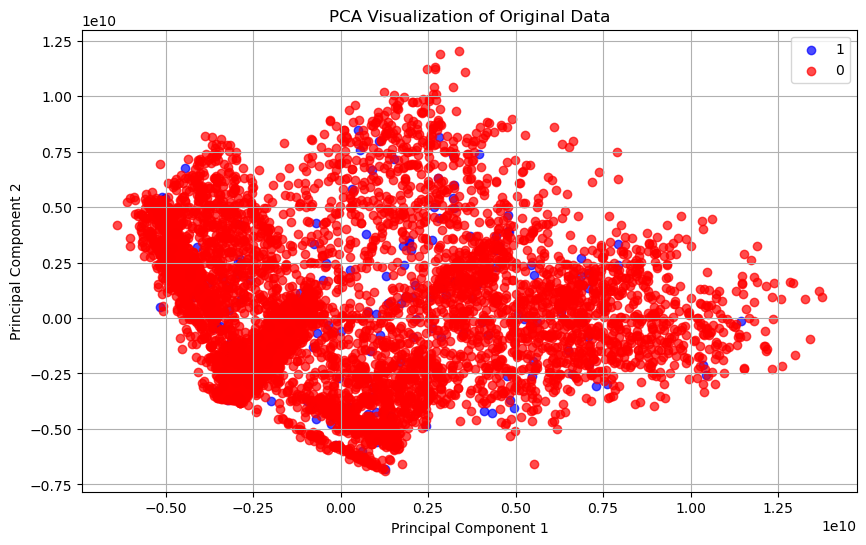

In [17]:
# 원본 데이터셋
X_pca_original = data.drop(columns=['Bankrupt?'])  # 클래스 레이블을 제외한 특성들
y_pca_original = data['Bankrupt?']  # 클래스 레이블

# PCA 모델 인스턴스화 (원본 데이터셋에 대한 PCA)
pca_original = PCA(n_components=2)  # 2차원으로 축소

# PCA 모델 훈련 (원본 데이터셋에 대한 PCA)
X_pca_transformed_original = pca_original.fit_transform(X_pca_original)

# 시각화를 위한 DataFrame 생성 (원본 데이터셋)
pca_df_original = pd.DataFrame(data=X_pca_transformed_original, columns=['PC1', 'PC2'])
pca_df_original['Bankrupt?'] = y_pca_original

# 클래스 별로 데이터 시각화 (원본 데이터셋)
plt.figure(figsize=(10, 6))
colors = ['blue', 'red']  # 각 클래스에 대한 색 지정
for label, color in zip(data['Bankrupt?'].unique(), colors):
    subset = pca_df_original[pca_df_original['Bankrupt?'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], c=color, label=label, alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Original Data')
plt.legend()
plt.grid(True)
plt.show()

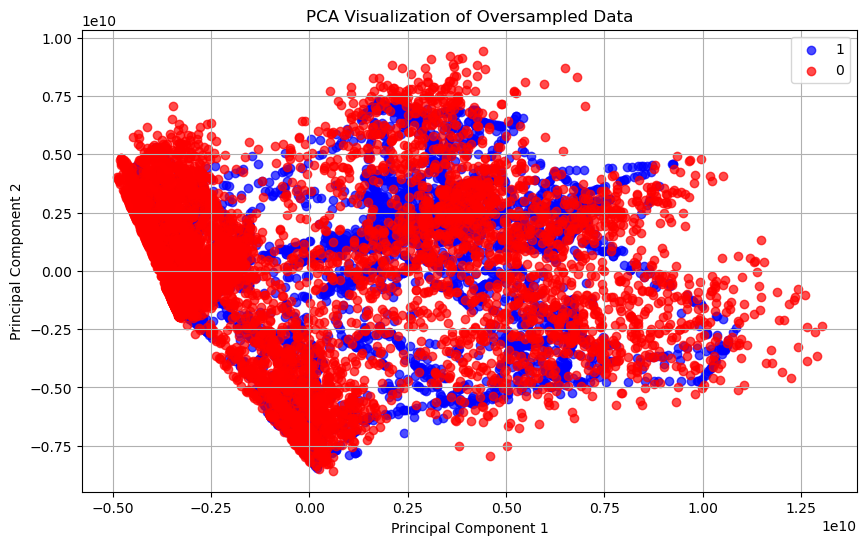

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# SMOTE로 증강된 데이터셋
X_pca_oversampled = balanced_data.drop(columns=['Bankrupt?'])  # 클래스 레이블을 제외한 특성들
y_pca_oversampled = balanced_data['Bankrupt?']  # 클래스 레이블

# PCA 모델 인스턴스화 (SMOTE로 증강된 데이터셋에 대한 PCA)
pca_oversampled = PCA(n_components=2)  # 2차원으로 축소

# PCA 모델 훈련 (SMOTE로 증강된 데이터셋에 대한 PCA)
X_pca_transformed_oversampled = pca_oversampled.fit_transform(X_pca_oversampled)

# 시각화를 위한 DataFrame 생성 (SMOTE로 증강된 데이터셋)
pca_df_oversampled = pd.DataFrame(data=X_pca_transformed_oversampled, columns=['PC1', 'PC2'])
pca_df_oversampled['Bankrupt?'] = y_pca_oversampled

# 클래스 별로 데이터 시각화 (SMOTE로 증강된 데이터셋)
plt.figure(figsize=(10, 6))
colors = ['blue', 'red']  # 각 클래스에 대한 색 지정
for label, color in zip(balanced_Bankrupt_counts.index, colors):
    subset = pca_df_oversampled[pca_df_oversampled['Bankrupt?'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], c=color, label=label, alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Oversampled Data')
plt.legend()
plt.grid(True)
plt.show()

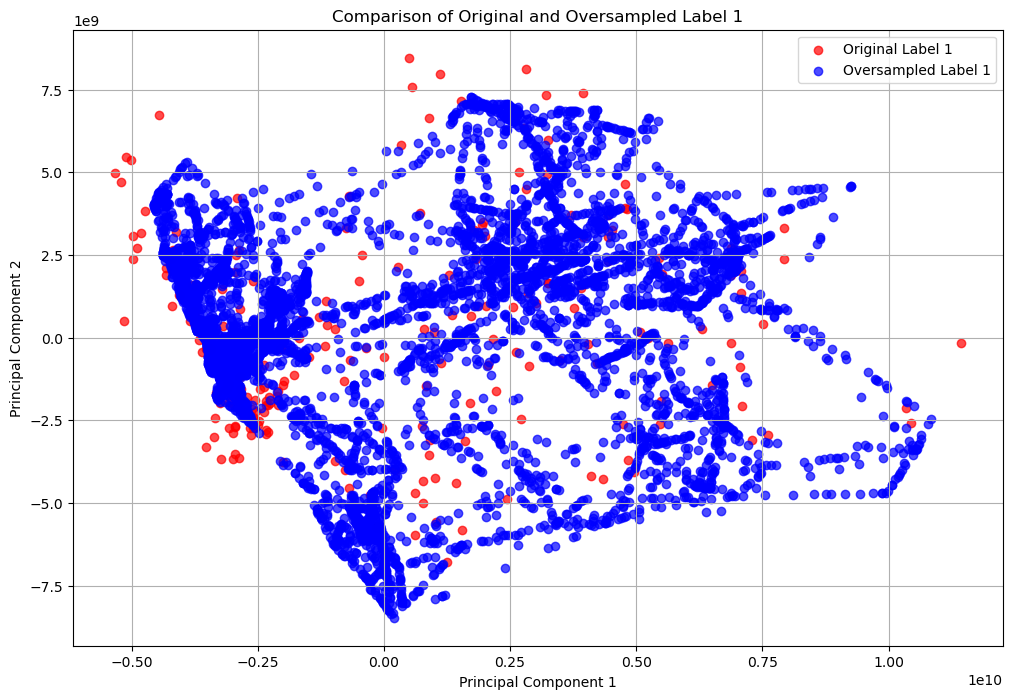

In [18]:
# 클래스 별로 데이터 시각화 (원본 데이터와 증강된 데이터 비교)
plt.figure(figsize=(12, 8))

# 원본 데이터의 1 라벨을 시각화
plt.scatter(X_pca_transformed_original[y_pca_original == 1, 0], X_pca_transformed_original[y_pca_original == 1, 1], c='red', label='Original Label 1', alpha=0.7)

# 증강된 데이터의 1 라벨을 시각화
plt.scatter(X_pca_transformed_oversampled[y_pca_oversampled == 1, 0], X_pca_transformed_oversampled[y_pca_oversampled == 1, 1], c='blue', label='Oversampled Label 1', alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Comparison of Original and Oversampled Label 1')
plt.legend()
plt.grid(True)
plt.show()


## 데이터 증강 문제점 분석 
- 기존 데이터에 비해 증간된 데이터가 너무 많아서 balanced 데이터의 개수 feature가 제대로 증강되어 있는지 확인 어렵